# DATA MODELING, HYPERPARAMETER TUNING AND CHOOSING THE BEST MODEL FOR PREDICTING THE PRICE OF AIRBNB

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import sklearn.preprocessing as preproc

In [2]:
#Reading the data
airbnb_model = pd.read_csv(r'C:\Users\upasa\OneDrive\Desktop\Coding Challenge\data_cleaned.csv')

In [3]:
#Counting the total number of rows and columns
airbnb_model.shape

(20677, 41)

# FEATURE ENGINEERING

## Numerical Features

In [4]:
#Checking all the categorical features in the cleaned dataset
airbnb_model_num = airbnb_model.select_dtypes(include = ['int64','float64'])
airbnb_model_num.dtypes

id                               int64
host_is_superhost              float64
host_listings_count            float64
latitude                       float64
longitude                      float64
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
price                          float64
security_deposit               float64
cleaning_fee                   float64
guests_included                  int64
extra_people                   float64
minimum_nights                   int64
maximum_nights                   int64
availability_30                  int64
availability_60                  int64
availability_90                  int64
availability_365                 int64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communicati

In [5]:
#Selecting the numerical features that I feel, I want to use to build model
num_var = ['security_deposit', 'cleaning_fee', 'extra_people', 'accommodates', 'bathrooms','bedrooms']

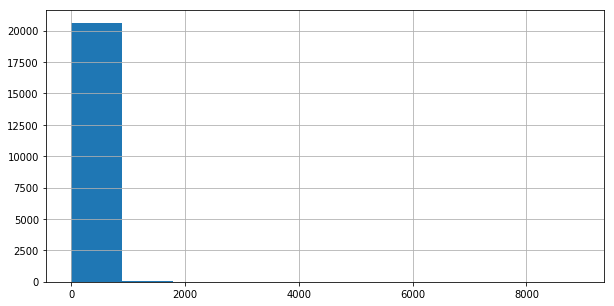

In [6]:
#plotting the histogram for column price
airbnb_model['price'].hist(figsize=(10,5));

I see that the price column is right skewed. For building model, data needs to be normalized and cannot be right skjewed or left skewed. Hence I will be be normalzing couple of columns.

In [7]:
price_scale = airbnb_model[['price']]

In [8]:
#Applying Min-Max scaling
price_scale['Min-Max'] = preproc.minmax_scale(airbnb_model[['price']])

C:\Users\upasa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
#Standardizing the data
price_scale['Standardization'] = preproc.StandardScaler().fit_transform(airbnb_model[['price']])

C:\Users\upasa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(27.125,0.5,'Frequency')

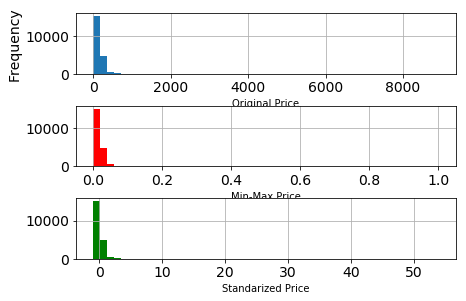

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.tight_layout()

# Plot Original Price
price_scale['price'].hist(ax=ax1, bins=50)
ax1.tick_params(labelsize=14)
ax1.set_xlabel("Original Price", fontsize=10)
ax1.set_ylabel("Frequency", fontsize=14)

# Plot Min-Max Scaling on Price
price_scale['Min-Max'].hist(ax=ax2, bins=50, color='r')
ax2.tick_params(labelsize=14)
ax2.set_xlabel("Min-Max Price", fontsize=10)
ax1.set_ylabel("Frequency", fontsize=14)

# Plot Standardized Scaling on Price
price_scale['Standardization'].hist(ax=ax3, bins=50, color='g')
ax3.tick_params(labelsize=14)
ax3.set_xlabel("Standarized Price", fontsize=10)
ax1.set_ylabel("Frequency", fontsize=14)

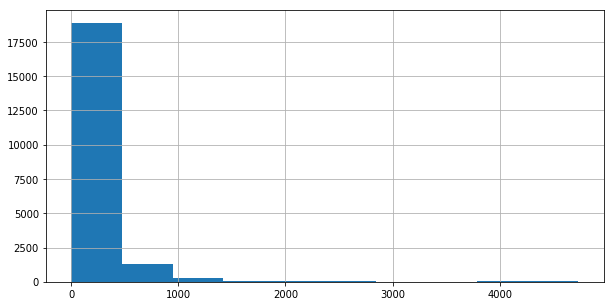

In [11]:
#plotting the histogram for column price
airbnb_model['security_deposit'].hist(figsize=(10,5));

Security deposit is right skewed, so its needs to be normalized. 

In [12]:
security_deposit_scale = airbnb_model[['security_deposit']]

In [13]:
security_deposit_scale['Min-Max'] = preproc.minmax_scale(airbnb_model[['security_deposit']])

C:\Users\upasa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
security_deposit_scale['Standardization'] = preproc.StandardScaler().fit_transform(airbnb_model[['security_deposit']])

C:\Users\upasa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5,15,'Standarized Price')

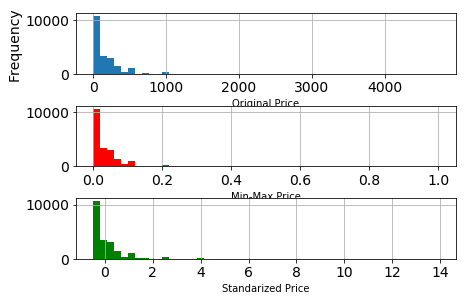

In [15]:
fig, (ax4, ax5, ax6) = plt.subplots(3,1)
fig.tight_layout()

# Plot Original Price
security_deposit_scale['security_deposit'].hist(ax=ax4, bins=50)
ax4.tick_params(labelsize=14)
ax4.set_xlabel("Original Price", fontsize=10)
ax4.set_ylabel("Frequency", fontsize=14)

# Plot Min-Max Scaling on Price
security_deposit_scale['Min-Max'].hist(ax=ax5, bins=50, color='r')
ax5.tick_params(labelsize=14)
ax5.set_xlabel("Min-Max Price", fontsize=10)

# Plot Standardized Scaling on Price
security_deposit_scale['Standardization'].hist(ax=ax6, bins=50, color='g')
ax6.tick_params(labelsize=14)
ax6.set_xlabel("Standarized Price", fontsize=10)

In [16]:
extra_people_scale = airbnb_model[['extra_people']]

In [17]:
extra_people_scale['Min-Max'] = preproc.minmax_scale(airbnb_model[['extra_people']])

C:\Users\upasa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
extra_people_scale['Standardization'] = preproc.StandardScaler().fit_transform(airbnb_model[['extra_people']])

C:\Users\upasa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5,15,'Standarized Price')

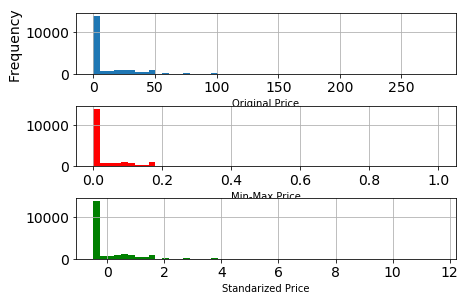

In [19]:
fig, (ax7, ax8, ax9) = plt.subplots(3,1)
fig.tight_layout()

# Plot Original Price
extra_people_scale['extra_people'].hist(ax=ax7, bins=50)
ax7.tick_params(labelsize=14)
ax7.set_xlabel("Original Price", fontsize=10)
ax7.set_ylabel("Frequency", fontsize=14)

# Plot Min-Max Scaling on Price
extra_people_scale['Min-Max'].hist(ax=ax8, bins=50, color='r')
ax8.tick_params(labelsize=14)
ax8.set_xlabel("Min-Max Price", fontsize=10)

# Plot Standardized Scaling on Price
extra_people_scale['Standardization'].hist(ax=ax9, bins=50, color='g')
ax9.tick_params(labelsize=14)
ax9.set_xlabel("Standarized Price", fontsize=10)

In [20]:
cleaning_fee_scale = airbnb_model[['cleaning_fee']]

In [21]:
cleaning_fee_scale['Min-Max'] = preproc.minmax_scale(airbnb_model[['cleaning_fee']])

C:\Users\upasa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
cleaning_fee_scale['Standardization'] = preproc.StandardScaler().fit_transform(airbnb_model[['cleaning_fee']])

C:\Users\upasa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5,15,'Standarized Price')

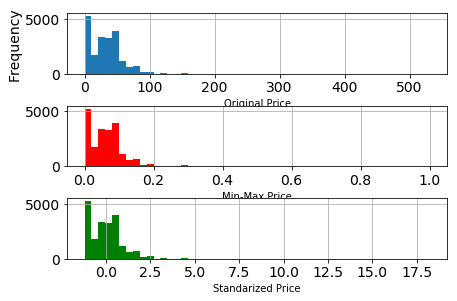

In [23]:
fig, (ax10, ax11, ax12) = plt.subplots(3,1)
fig.tight_layout()

# Plot Original Price
cleaning_fee_scale['cleaning_fee'].hist(ax=ax10, bins=50)
ax10.tick_params(labelsize=14)
ax10.set_xlabel("Original Price", fontsize=10)
ax10.set_ylabel("Frequency", fontsize=14)

# Plot Min-Max Scaling on Price
cleaning_fee_scale['Min-Max'].hist(ax=ax11, bins=50, color='r')
ax11.tick_params(labelsize=14)
ax11.set_xlabel("Min-Max Price", fontsize=10)

# Plot Standardized Scaling on Price
cleaning_fee_scale['Standardization'].hist(ax=ax12, bins=50, color='g')
ax12.tick_params(labelsize=14)
ax12.set_xlabel("Standarized Price", fontsize=10)

### Categorical Features

In [24]:
#Checking all the categorical features in the cleaned dataset
airbnb_model_cat = airbnb_model.select_dtypes(include = ['object','category'])
airbnb_model_cat.dtypes

name                      object
host_response_time        object
host_response_rate        object
street                    object
neighbourhood_cleansed    object
city                      object
state                     object
property_type             object
room_type                 object
amenities                 object
calendar_updated          object
cancellation_policy       object
dtype: object

In [25]:
#Selecting the categorical features that I feel, I want to use to build model
cat_var = ['host_response_time','property_type', 'room_type', 'cancellation_policy']

In [26]:
airbnb_model['cancellation_policy'].value_counts()

strict_14_with_grace_period    8004
moderate                       7492
flexible                       5043
super_strict_60                 112
super_strict_30                  26
Name: cancellation_policy, dtype: int64

I see that there are 5 categories in cancellation policy. I am categorizing these categories to strict_14_with_grace_period and moderate. 

In [27]:
# Minimizing the categoris and replacing 
airbnb_model.cancellation_policy.replace({
    'super_strict_30': 'strict_14_with_grace_period',
    'super_strict_60': 'strict_14_with_grace_period',
    'strict': 'strict_14_with_grace_period'
    }, inplace=True)

In [28]:
airbnb_model['cancellation_policy'].value_counts()

strict_14_with_grace_period    8142
moderate                       7492
flexible                       5043
Name: cancellation_policy, dtype: int64

In [29]:
airbnb_model['host_response_time'].value_counts()

unknown               8541
within an hour        6217
within a few hours    3016
within a day          2570
a few days or more     333
Name: host_response_time, dtype: int64

I see that there are 5 categories in host response time. I am categorizing these categories to same_day and other_day. 

In [30]:
def host_response(x):
    if 'within an hour' in x:
        return 'Same_day'
    elif 'within a few hours.' in x:
        return 'Same_day'
    elif 'within a day' in x:
        return 'Same_day'
    elif 'a few days or more' in x:
        return 'Other_day'
    else:
        return 'Other_day'

In [31]:
# feature for the title of each person
airbnb_model['host_response_time'] = airbnb_model['host_response_time'].apply(host_response)

airbnb_model['host_response_time'].value_counts()

Other_day    11890
Same_day      8787
Name: host_response_time, dtype: int64

In [32]:
airbnb_model['property_type'].value_counts()

Apartment    16293
House         2382
Other         2002
Name: property_type, dtype: int64

In [34]:
airbnb_model['room_type'].value_counts()

Entire home/apt    16402
Private room        4194
Shared room           81
Name: room_type, dtype: int64

Converting the categorical variable to numerical variable. 

In [35]:
#Categorical to numerical
cat_to_num = {"host_response_time": {"Same_day": 1, "Other_day": 0},
                "property_type": {"Apartment": 0, "House": 1, "Other":2},
                "cancellation_policy":{"strict_14_with_grace_period":0, "moderate":1, "flexible":2},
              "room_type":{"Entire home/apt":0, "Private room":1, "Shared room":2}
             }

airbnb_model.replace(cat_to_num, inplace=True) 

Identifying and defining the categorical and numerical features seperately. 

In [36]:
#defining the output variable
output_var = ['price']

#Final columns to use
col2use = cat_var + num_var 

#DEfining the dataframe for each of these categories
categorical_df = airbnb_model[cat_var]
numerical_df = airbnb_model[num_var]
output_df = airbnb_model[output_var]

#Concatinating all the columns in a dataframe
new_data_frame = pd.concat([categorical_df,numerical_df,output_df], axis=1)

# MACHINE LEARNING

Splitting the dataset into test and train

In [37]:
from sklearn.model_selection import train_test_split

# Create the X and y set
X = new_data_frame.iloc[:,1:]
y = new_data_frame.iloc[:,0]

# Define train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42, stratify=y)

In this section, we train a few machine learning models and use a few techniques for optimizing them. We will then select the best model based on performance on the validation set.

These are the model evaluation parameters that I am using for checking the performace of the model. 

In [38]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity

Since the training dataset is labeled, I am seeting the threshold at 0.5 to label a predicted sample as positive.

In [39]:
#Setting the threshold value
thresh = 0.5

# Model Building

In this section, I will compare the performance of 5 machine learning models using default hyperparameters.

## Stochastic Gradient Descent

In [40]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train, y_train)

SGDClassifier(alpha=0.1, loss='log', random_state=42)

In [41]:
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

In [42]:
y_train_preds = sgdc.predict_proba(X_train)[:,1]
y_test_preds = sgdc.predict_proba(X_test)[:,1]

print('Stochastic Gradient Descend')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Testing:')
sgdc_test_auc, sgdc_test_accuracy, sgdc_test_recall, sgdc_test_precision, sgdc_test_specificity = print_report(y_test,y_test_preds, thresh)

Stochastic Gradient Descend
Training:
AUC:0.589
accuracy:0.565
recall:0.591
precision:0.491
specificity:0.547
prevalence:0.425
 
Testing:
AUC:0.595
accuracy:0.567
recall:0.587
precision:0.492
specificity:0.552
prevalence:0.425
 


## Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [44]:
y_train_preds = nb.predict_proba(X_train)[:,1]
y_test_preds = nb.predict_proba(X_test)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Testing:')
nb_test_auc, nb_test_accuracy, nb_test_recall, nb_test_precision, nb_test_specificity = print_report(y_test,y_test_preds, thresh)

Naive Bayes
Training:
AUC:0.608
accuracy:0.608
recall:0.345
precision:0.563
specificity:0.802
prevalence:0.425
 
Testing:
AUC:0.609
accuracy:0.606
recall:0.339
precision:0.560
specificity:0.803
prevalence:0.425
 


## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [46]:
y_train_preds = tree.predict_proba(X_train)[:,1]
y_test_preds = tree.predict_proba(X_test)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Testing:')
tree_test_auc, tree_test_accuracy, tree_test_recall, tree_test_precision, tree_test_specificity = print_report(y_test,y_test_preds, thresh)

Decision Tree
Training:
AUC:0.754
accuracy:0.700
recall:0.443
precision:0.749
specificity:0.882
prevalence:0.425
 
Testing:
AUC:0.630
accuracy:0.627
recall:0.369
precision:0.599
specificity:0.807
prevalence:0.425
 


## Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [48]:
y_train_preds = rf.predict_proba(X_train)[:,1]
y_test_preds = rf.predict_proba(X_test)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Testing:')
rf_test_auc, rf_test_accuracy, rf_test_recall, rf_test_precision, rf_test_specificity = print_report(y_test,y_test_preds, thresh)

Random Forest
Training:
AUC:0.690
accuracy:0.655
recall:0.328
precision:0.699
specificity:0.896
prevalence:0.425
 
Testing:
AUC:0.660
accuracy:0.634
recall:0.311
precision:0.644
specificity:0.873
prevalence:0.425
 


## Gradient Boosting Classifier

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [50]:
y_train_preds = gbc.predict_proba(X_train)[:,1]
y_test_preds = gbc.predict_proba(X_test)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Testing:')
gbc_test_auc, gbc_test_accuracy, gbc_test_recall, gbc_test_precision, gbc_test_specificity = print_report(y_test,y_test_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:0.757
accuracy:0.704
recall:0.502
precision:0.717
specificity:0.854
prevalence:0.425
 
Testing:
AUC:0.647
accuracy:0.636
recall:0.433
precision:0.599
specificity:0.786
prevalence:0.425
 


### Analysis of the results obtained 

I am making a dataframe with these results and plotting the outcomes using a package called seaborn. In this project, I will utilize the Area under the ROC curve (AUC) to evaluate the best model as it captures the trade off between the true positive and false positive and does not require selecting a threshold. But I woulod be plotting the results of the model evaltaion parameters. 

In [51]:
data_frame_results = pd.DataFrame({'classifier':['SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB'],
                           'data_set':['Training','Testing']*5,
                          'auc':[sgdc_train_auc,sgdc_test_auc,nb_train_auc,nb_test_auc,tree_train_auc,tree_test_auc,rf_train_auc,rf_test_auc,gbc_test_auc,gbc_test_auc,],
                          'accuracy':[sgdc_train_accuracy,sgdc_test_accuracy,nb_train_accuracy,nb_test_accuracy,tree_train_accuracy,tree_test_accuracy,rf_train_accuracy,rf_test_accuracy,gbc_test_accuracy,gbc_test_accuracy,],
                          'recall':[sgdc_train_recall,sgdc_test_recall,nb_train_recall,nb_test_recall,tree_train_recall,tree_test_recall,rf_train_recall,rf_test_recall,gbc_test_recall,gbc_test_recall,],
                          'precision':[sgdc_train_precision,sgdc_test_precision,nb_train_precision,nb_test_precision,tree_train_precision,tree_test_precision,rf_train_precision,rf_test_precision,gbc_test_auc,gbc_test_precision,],
                          'specificity':[sgdc_train_specificity,sgdc_test_specificity,nb_train_specificity,nb_test_specificity,tree_train_specificity,tree_test_specificity,rf_train_specificity,rf_test_specificity,gbc_test_specificity,gbc_test_specificity,]})

In [52]:
sns.set(style="whitegrid")

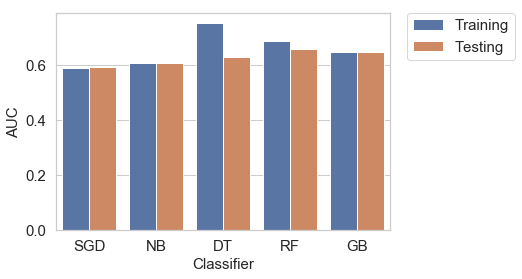

In [53]:
ax13 = sns.barplot(x="classifier", y="auc", hue="data_set", data=data_frame_results)
ax13.set_xlabel('Classifier',fontsize = 15)
ax13.set_ylabel('AUC', fontsize = 15)
ax13.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

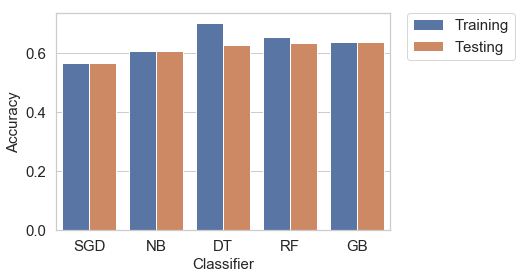

In [54]:
ax14 = sns.barplot(x="classifier", y="accuracy", hue="data_set", data=data_frame_results)
ax14.set_xlabel('Classifier',fontsize = 15)
ax14.set_ylabel('Accuracy', fontsize = 15)
ax14.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

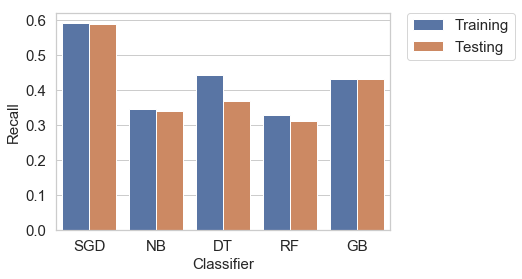

In [55]:
ax15 = sns.barplot(x="classifier", y="recall", hue="data_set", data=data_frame_results)
ax15.set_xlabel('Classifier',fontsize = 15)
ax15.set_ylabel('Recall', fontsize = 15)
ax15.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

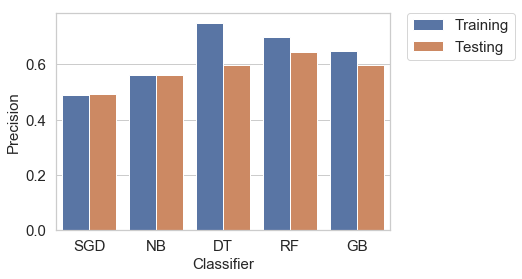

In [56]:
ax16 = sns.barplot(x="classifier", y="precision", hue="data_set", data=data_frame_results)
ax16.set_xlabel('Classifier',fontsize = 15)
ax16.set_ylabel('Precision', fontsize = 15)
ax16.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

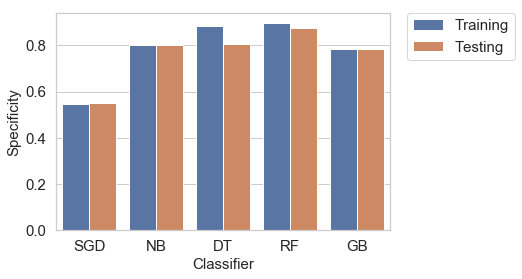

In [57]:
ax = sns.barplot(x="classifier", y="specificity", hue="data_set", data=data_frame_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('Specificity', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

My next step is improvising the model by changing the hyper parameter values. 

## Hyperparameter Tuning

### Optimizing Random Forest

In [58]:
#Checking the parameter in random forest
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

I will be setting the value of each hyper parameters.

In [59]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(200,1000,200)

# maximum number of features to use at each split
max_features = ['auto','sqrt']

# maximum depth of the tree
max_depth = range(1,10,1)

# minimum number of samples to split a node
min_samples_split = range(2,10,2)

# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(1, 10), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [60]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [61]:
# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 2, scoring=auc_scoring,
                               verbose = 1, random_state = 42)

In [62]:
# fit the random search model (this will take a few minutes)
t1 = time.time()
rf_random.fit(X_train, y_train)
t2 = time.time()
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.2min finished


74.8616042137146


Looking into the best parameter for this model

In [63]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'max_features': 'auto',
 'max_depth': 9,
 'criterion': 'gini'}

Checking the values of the best model as compared to the base model built

In [64]:
y_train_preds = rf.predict_proba(X_train)[:,1]
y_test_preds = rf.predict_proba(X_test)[:,1]

print('Baseline Random Forest')
rf_train_auc_base = roc_auc_score(y_train, y_train_preds)
rf_test_auc_base = roc_auc_score(y_test, y_test_preds)

print('Training AUC:%.3f'%(rf_train_auc_base))
print('Testing AUC:%.3f'%(rf_test_auc_base))
print()

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train)[:,1]
y_test_preds_random = rf_random.best_estimator_.predict_proba(X_test)[:,1]

rf_train_auc = roc_auc_score(y_train, y_train_preds_random)
rf_test_auc = roc_auc_score(y_test, y_test_preds_random)

print('Training AUC:%.3f'%(rf_train_auc))
print('Testing AUC:%.3f'%(rf_test_auc))

Baseline Random Forest
Training AUC:0.690
Testing AUC:0.660

Optimized Random Forest
Training AUC:0.759
Testing AUC:0.672


### Optimizing Stochastic gradient descent 

In [65]:
penalty = ['none','l2','l1']
max_iter = range(100,500,100)
alpha = [0.001,0.003,0.01,0.03,0.1,0.3]
random_grid_sgdc = {'penalty':penalty,
              'max_iter':max_iter,
              'alpha':alpha}
# create the randomized search cross-validation
sgdc_random = RandomizedSearchCV(estimator = sgdc, param_distributions = random_grid_sgdc, 
                                 n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, 
                                 random_state = 42)

t1 = time.time()
sgdc_random.fit(X_train, y_train)
t2 = time.time()
print(t2-t1)

2.3628201484680176


Looking into the best parameter for this model

In [66]:
sgdc_random.best_params_

{'penalty': 'none', 'max_iter': 300, 'alpha': 0.1}

Checking the values of the best model as compared to the base model built

In [67]:
y_train_preds = sgdc.predict_proba(X_train)[:,1]
y_test_preds = sgdc.predict_proba(X_test)[:,1]

print('Baseline sgdc')
sgdc_train_auc_base = roc_auc_score(y_train, y_train_preds)
sgdc_test_auc_base = roc_auc_score(y_test, y_test_preds)

print('Training AUC:%.3f'%(sgdc_train_auc_base))
print('Testing AUC:%.3f'%(sgdc_test_auc_base))
print()
print('Optimized sgdc')
y_train_preds_random = sgdc_random.best_estimator_.predict_proba(X_train)[:,1]
y_test_preds_random = sgdc_random.best_estimator_.predict_proba(X_test)[:,1]
sgdc_train_auc = roc_auc_score(y_train, y_train_preds_random)
sgdc_test_auc = roc_auc_score(y_test, y_test_preds_random)

print('Training AUC:%.3f'%(sgdc_train_auc))
print('Testing AUC:%.3f'%(sgdc_test_auc))

Baseline sgdc
Training AUC:0.589
Testing AUC:0.595

Optimized sgdc
Training AUC:0.596
Testing AUC:0.586


### Optimizing Gradient Boosting Classifier

In [68]:
# number of trees
n_estimators = range(100,500,100)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc,
                                n_iter = 20, cv = 2, scoring=auc_scoring,
                                verbose = 0, random_state = 42)

t1 = time.time()
gbc_random.fit(X_train, y_train)
t2 = time.time()
print(t2-t1)

46.83143353462219


Looking into the best parameter for this model

In [69]:
gbc_random.best_params_

{'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.1}

Checking the values of the best model as compared to the base model built

In [70]:
y_train_preds = gbc.predict_proba(X_train)[:,1]
y_test_preds = gbc.predict_proba(X_test)[:,1]

print('Baseline gbc')
gbc_train_auc_base = roc_auc_score(y_train, y_train_preds)
gbc_test_auc_base = roc_auc_score(y_test, y_test_preds)

print('Training AUC:%.3f'%(gbc_train_auc_base))
print('Validation AUC:%.3f'%(gbc_test_auc_base))
print()

print('Optimized gbc')
y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train)[:,1]
y_test_preds_random = gbc_random.best_estimator_.predict_proba(X_test)[:,1]
gbc_train_auc = roc_auc_score(y_train, y_train_preds_random)
gbc_test_auc = roc_auc_score(y_test, y_test_preds_random)

print('Training AUC:%.3f'%(gbc_train_auc))
print('Validation AUC:%.3f'%(gbc_test_auc))

Baseline gbc
Training AUC:0.757
Validation AUC:0.647

Optimized gbc
Training AUC:0.733
Validation AUC:0.667


In [71]:
data_frame_results1 = pd.DataFrame({'classifier':['SGD','SGD','RF','RF','GB','GB'],
                           'data_set':['Base Model','Optimized Model']*3,
                          'auc':[sgdc_test_auc_base,sgdc_test_auc,
                                 rf_test_auc_base,rf_test_auc,
                                 gbc_test_auc_base,gbc_test_auc,],
                          })

In [72]:
#Comparing the values
data_frame_results1

,classifier,data_set,auc
0,SGD,Base Model,0.594832
1,SGD,Optimized Model,0.585740
2,RF,Base Model,0.660225
3,RF,Optimized Model,0.671697
4,GB,Base Model,0.647043
5,GB,Optimized Model,0.667044


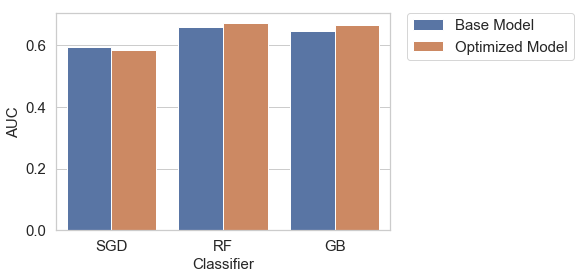

In [73]:
#Plotting the results
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=data_frame_results1)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

By doing the hyperparameter tuning, I see that the performance of the models has increased a lot. 

From the above output, I conclude that Random Forest is the best model for predicting the price of Airbnb. 